# Workflow development with aider & LLMs

In [1]:
%config IPCompleter.evaluation='unsafe'

/Users/joerg/python_projects/aider/workflows/node_library/math.py:36: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(x)
/Users/joerg/python_projects/aider/workflows/node_library/math.py:30: RuntimeWarning: invalid value encountered in arcsin
  arcsin = np.arcsin(x)


{'plot_sin__axis': <Axes: title={'center': 'sin(x)'}>,
 'plot_cos__axis': <Axes: title={'center': 'cos(x)'}>,
 'plot_tan__axis': <Axes: title={'center': 'tan(x)'}>,
 'plot_arcsin__axis': <Axes: title={'center': 'arcsin(x)'}>,
 'plot_arccos__axis': <Axes: title={'center': 'arccos(x)'}>,
 'plot_arctan__axis': <Axes: title={'center': 'arctan(x)'}>}

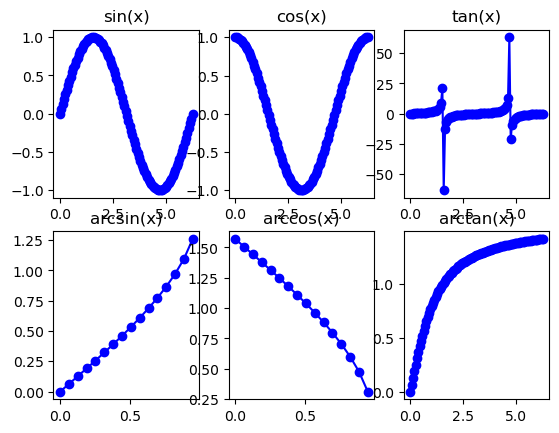

In [2]:
from pyiron_workflow import Workflow

# Register the necessary node packages                                                                        
Workflow.register("node_library.math", "math")
Workflow.register("node_library.plotting", "plotting")

# Create a new workflow                                                                                       
wf = Workflow("trigonometric_functions")

# Create a Linspace node to generate a vector  
import numpy as np

wf.linspace = wf.create.plotting.Linspace(start=0, stop=2 * np.pi, num=100)

# Create nodes for each trigonometric function                                                                
wf.sin = wf.create.math.Sin(x=wf.linspace)
wf.cos = wf.create.math.Cos(x=wf.linspace)
wf.tan = wf.create.math.Tan(x=wf.linspace)
wf.arcsin = wf.create.math.Arcsin(x=wf.linspace)
wf.arccos = wf.create.math.Arccos(x=wf.linspace)
wf.arctan = wf.create.math.Arctan(x=wf.linspace)

# Create a subplot node                                                                                       
wf.subplot = wf.create.plotting.Subplot(nrows=2, ncols=3)

# Create plot nodes for each trigonometric function                                                           
wf.plot_sin = wf.create.plotting.Plot(x=wf.linspace, y=wf.sin, axis=wf.subplot[0, 0], title='sin(x)')
wf.plot_cos = wf.create.plotting.Plot(x=wf.linspace, y=wf.cos, axis=wf.subplot[0, 1], title='cos(x)')
wf.plot_tan = wf.create.plotting.Plot(x=wf.linspace, y=wf.tan, axis=wf.subplot[0, 2], title='tan(x)')
wf.plot_arcsin = wf.create.plotting.Plot(x=wf.linspace, y=wf.arcsin, axis=wf.subplot[1, 0], title='arcsin(x)')
wf.plot_arccos = wf.create.plotting.Plot(x=wf.linspace, y=wf.arccos, axis=wf.subplot[1, 1], title='arccos(x)')
wf.plot_arctan = wf.create.plotting.Plot(x=wf.linspace, y=wf.arctan, axis=wf.subplot[1, 2], title='arctan(x)')

# Execute the workflow                                                                                        
wf()


### Pyiron atomistic examples

### Create a supercell

In [3]:
from pyiron_workflow import Workflow                                                                        
                                                                                                         
# Register the necessary node packages                                                                      
Workflow.register("node_library.atomistic", "atomistic")                                        
                                                                                                         
# Create a new workflow                                                                                     
wf = Workflow("bulk_structure")                                                                             
                                                                                                         
# Create a cubic_bulk node to generate an aluminum cubic supercell of size 3x3x3                                                              
wf.supercell = wf.create.atomistic.structure.build.cubic_bulk_cell(element='Al', cell_size=3)
                                                                                                         
# Execute the workflow                                                                                      
out = wf() 

create bulk


/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to name, andthus could not disconnect from it.
  warn(
/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to repeat_scalar, andthus could not disconnect from it.
  warn(
/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to index, andthus could not disconnect from it.
  warn(


In [4]:
wf.outputs.supercell__structure.value.plot3d(particle_size=3)

NGLWidget()

### Compute supercell energy

In [5]:
from pyiron_workflow import Workflow                
               
# Register the necessary node packages 
Workflow.register("node_library.atomistic", "atomistic") 
                      
# Create a new workflow  
wf = Workflow("bulk_structure") 
   
# Create a cubic_bulk node to generate an aluminum cubic supercell of size 3x3x3 with vacancy at atom index 0
wf.supercell = wf.create.atomistic.structure.build.cubic_bulk_cell(element='Al', cell_size=3, vacancy_index=0)
wf.calc = wf.create.atomistic.calculator.ase.minimize(atoms=wf.supercell)
                     
# Execute the workflow
out = wf()

print (f"total energy: {wf.calc.outputs.out.final.energy.value}")

create bulk


/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to name, andthus could not disconnect from it.
  warn(
/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to repeat_scalar, andthus could not disconnect from it.
  warn(
/Users/joerg/python_projects/git_libs/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel user_input was not connected to index, andthus could not disconnect from it.
  warn(


energy:  0.8013167095856435 0.7996059979142878
total energy: 0.8013167095856435


In [21]:
wf.supercell.bulk.outputs.structure.value.plot3d(particle_size=3)

NGLWidget()

In [22]:
wf.calc.outputs.out.final.energy.value

0.8013167095856435

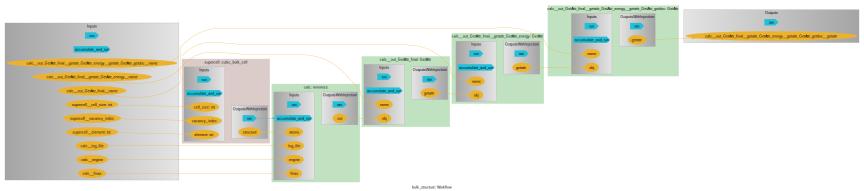

In [27]:
wf.draw(size=(12,15))

### Compute vacancy formation energy

In [ ]:
wf.supercell.outputs.structure.value.get_number_of_atoms()

In [31]:
from pyiron_workflow import Workflow                
               
# Register the necessary node packages 
Workflow.register("node_library.atomistic", "atomistic") 
                      
# Create a new workflow  
wf = Workflow("bulk_structure") 
   
# Create a cubic_bulk node to generate an aluminum cubic supercell of size 3x3x3 with vacancy at atom index 0
wf.supercell = wf.create.atomistic.structure.build.cubic_bulk_cell(element='Al', cell_size=3, vacancy_index=0)
wf.calc = wf.create.atomistic.calculator.ase.minimize(atoms=wf.supercell)
                     
# Execute the workflow
out = wf()

from vacancy import compute_vacancy_formation_energy

# Compute the energy of a pure bulk cell
pure_bulk_wf = Workflow("pure_bulk")
pure_bulk_wf.supercell = pure_bulk_wf.create.atomistic.structure.build.cubic_bulk_cell(element='Al', cell_size=3)
pure_bulk_wf.calc = pure_bulk_wf.create.atomistic.calculator.ase.minimize(atoms=pure_bulk_wf.supercell)
pure_bulk_out = pure_bulk_wf()

# Compute the vacancy formation energy
n_atoms_in_pure_bulk_cell = pure_bulk_wf.create.atomistic.structure.calc.number_of_atoms(pure_bulk_wf.supercell).run()
vacancy_formation_energy = compute_vacancy_formation_energy(pure_bulk_wf.calc.outputs.out.final.energy.value, wf.calc.outputs.out.final.energy.value, n_atoms_in_pure_bulk_cell)
print(f"vacancy formation energy: {vacancy_formation_energy}")


create bulk
energy:  0.8013167095856435 0.7996059979142878
create bulk
energy:  -0.16222113933213578 -0.16222113933213578
vacancy formation energy: 0.9620358013313706


In [ ]:
%run example.py

In [32]:
from pyiron_workflow import Workflow

Workflow.register("node_library.atomistic", "atomistic") 
engine = Workflow.create.atomistic.engine.ase.M3GNet()y

In [ ]:
get_chem_pot = Workflow.create.atomistic.property.thermodynamics.get_chemical_potential('W', engine=engine)
get_chem_pot.run()

In [ ]:
engine.calculator